In [1]:
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0xb302067b8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1c3aafdb00>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1c3aafdac8>)

In [5]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
mnist.train.images.shape

(55000, 784)

In [7]:
mnist.test.images.shape

(10000, 784)

In [8]:
mnist.validation.images.shape

(5000, 784)

In [9]:
mnist.train.labels.shape

(55000, 10)

In [10]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [11]:
import numpy as np
import matplotlib.pyplot as plt

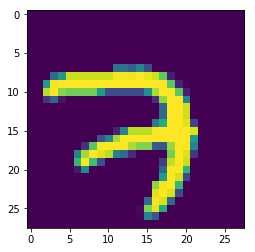

In [12]:
first_image = mnist.train.images[0]
first_image = np.array(first_image, dtype = 'float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [13]:
with tf.Session() as sess:
    print(tf.random_normal([2,3]).eval())

[[-0.07876322 -1.0492759  -0.5521301 ]
 [ 0.06171749  0.7109927   0.13557547]]


In [14]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes])),
}
biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes])),
}

In [15]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    output = tf.add(tf.matmul(out_layer2, weights['out'])

In [18]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [19]:
pred = forward_propagation(x, weights, biases)
predictions = tf.argmax(pred, 1)
true_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, true_labels)

In [23]:
predictions_eval, labels, correct_pred = sess.run([predictions, true_labels, correct_predictions], feed_dict={x:mnist.test.images, y:mnist.test.labels})

In [25]:
correct_pred.sum()

1330